### The art of (code) translation ###
As someone who works with a lot of data, I've noticed that sometimes certain coding languages are better suited towards specific tasks. On the other hand, projects can get more complicated when several scripts in several languages are involved, especially if not everybody on the team has the same amount of familiarity with each language. 

::::: {.}
The goal today is to do an excercise with coding languages inspired by Chapter 3 of *Prompt Engineering for Generative AI* (Phoenix and Taylor 2024). The authors ask an LLM to create simple text in English. Then, they "Now make the text incredibly complex and hard to read.". They ask AI to translate this complicated English text into simple Spanish text. Finally, they ask for the Spanish to be translated back into English and compare the output with the simple English text that the exercise began with. They find that LLMs do pretty well at this and attribute much of that success to the fact that Spanish and English texts are both widely available online.
:::::


#### Steps of this experiment #### 

```{mermaid}
flowchart LR
  A[1. Generate simple Stata code] --> B[2. Make it harder to understand]
  B --> C[3. Translate to R in the simplest way possible]
  C --> D[4. Translate back to Stata]
```

I'd like to avoid loading specific datasets into Stata and R, so I am going to prompt ChatGPT to build simple Stata code that involves drawing random numbers. 

##### Step 1: Generate simple Stata code #####

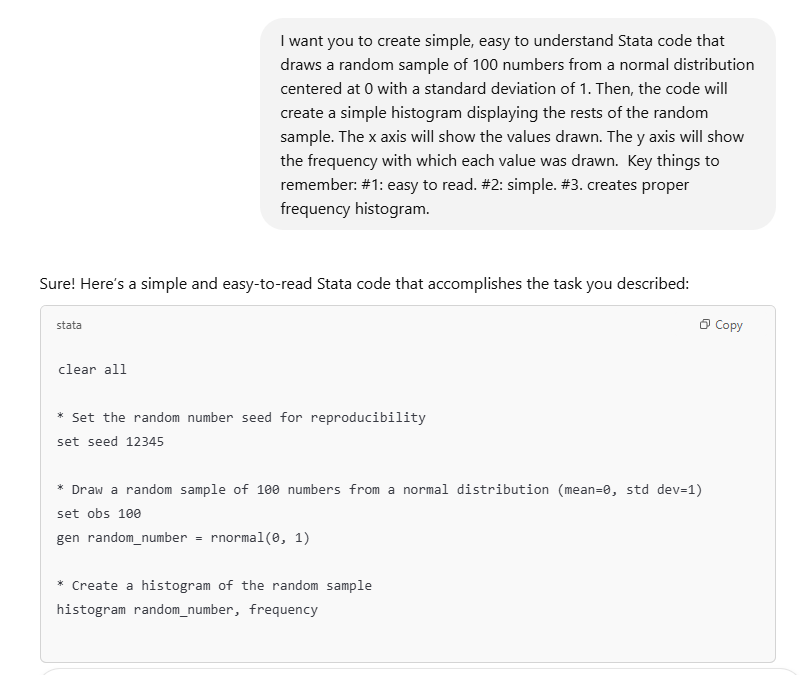

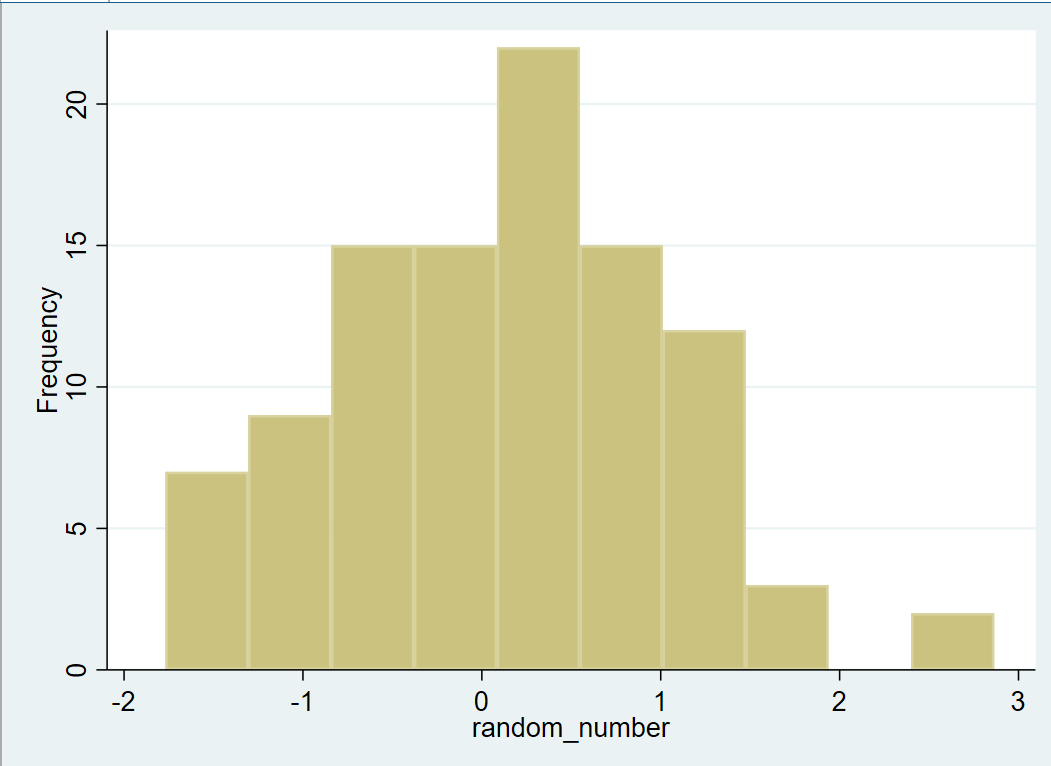

##### Step 2: Make it harder to understand #####

Now, in the same chat window, I will ask a variation of what Phoenix and Taylor asked in their Spanish to English example: "Now make the code incredibly complex and hard to read. BUT, it still needs to be able to run!" 

ChatGPT reported the following about its new code: 

*What makes this code unnecessarily complicated:*
1. *Unnecessary local variables: Uses random operations like runiform and rnormal wrapped in local variables for no reason.*
2. *Confusing foreach and forval loops: Uses loops when they aren’t needed, just to replace values in a random manner.*
3. *Overuse of macros and complicated conditions: Involves checking macro lists, even though they aren't required to generate the histogram.*
4. *Unnecessary graph twoway scatter: Adds a scatter plot for the same data, even though the task is to generate a histogram.*


While certainly overly complicated, this new code did not run. So I asked ChatGPT to try again. And again. I told it the errors that were appearing and got validating answers such as: 
- "Ah, I see the issue now! In Stata, you can't use both the bin() and width() options together in the histogram command."
- "You're right! I overlooked that once again. The issue is that Stata does not allow both bin() and width() to be used at the same time, so let's adjust it to use one of those options correctly."

Eventually, I gave up and just troubleshooted the code that it outputted myself. I think ChatGPT was getting really excited about making the code needlessly complex, so it kept trying to add **ALL** the graphing options when that wasn't actually allowed. 

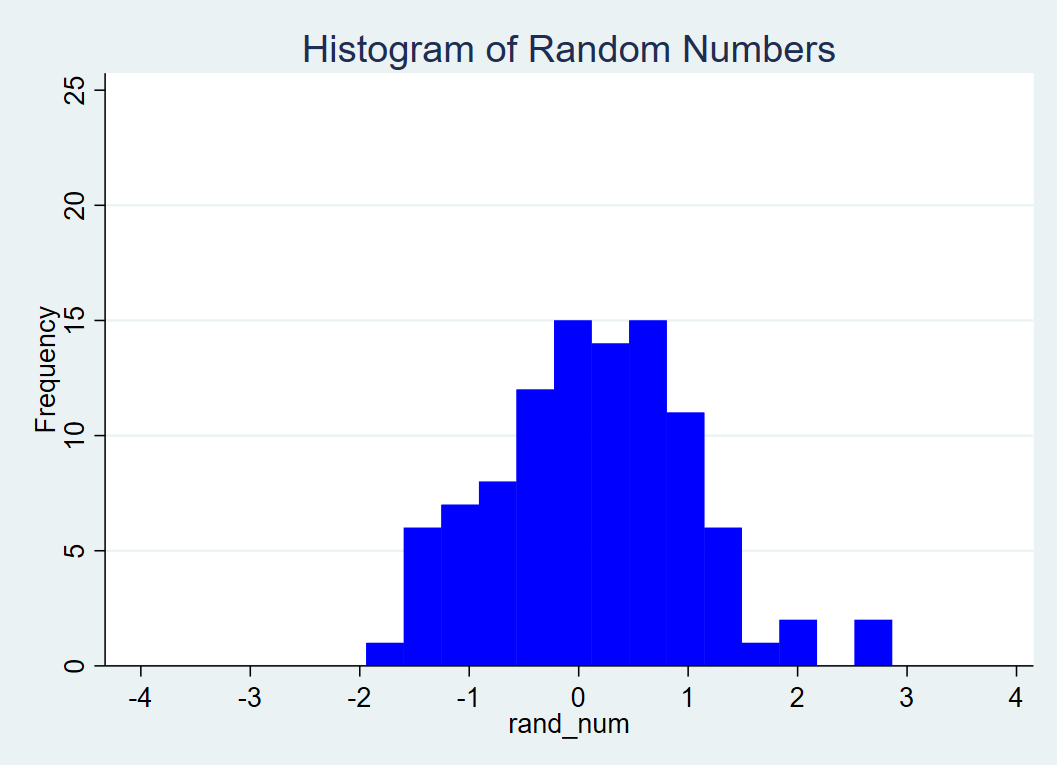

##### Step 3: Translate to R in the simplest way possible #####

Time to ask another variation of Phoenix and Taylor's prompt. In the same window, I said: 

*Now transform the Stata code into a simple, easy to read format that's in R code
, make sure that it is very easy to understand and read. You must ensure
that it is as simple to comprehend as possible.*

ChatGPT did great here. Easy breezy, our histogram is now in R.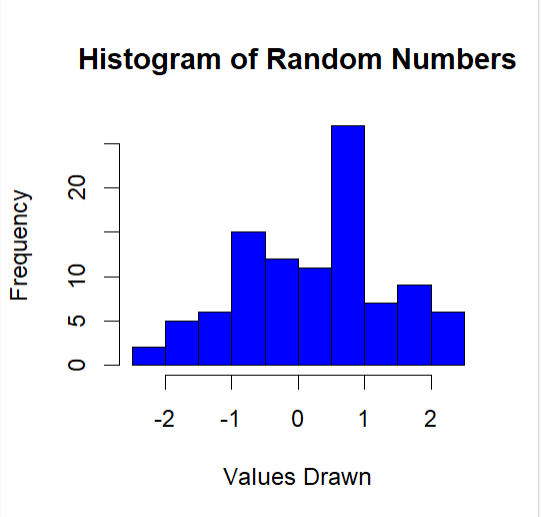

##### 4. Translate back to Stata ####
Given how well ChatGPT did at translating this code to R, and given how simple the code is now, I expected that this would be a breeze.  

But it wasn't, because once again ChatGPT showed a lack of understanding of Stata image formatting commands! When I told it the error I was getting, I once again got a very affirming response: 

*You're absolutely right! In Stata, the `edgecolor()` option is not available for histograms. To correct that and ensure the code runs smoothly, I’ll remove that option and simplify the command while keeping it easy to understand.*

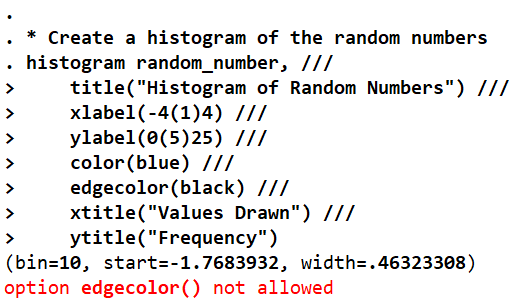

After this correction, the code did run, but ChatGPT forgot to add the frequency option, so the data y axis shows the probability of each outcome from 0 to 0.5. But the y axis labels are still set to reflect frequency. It's not a good look!

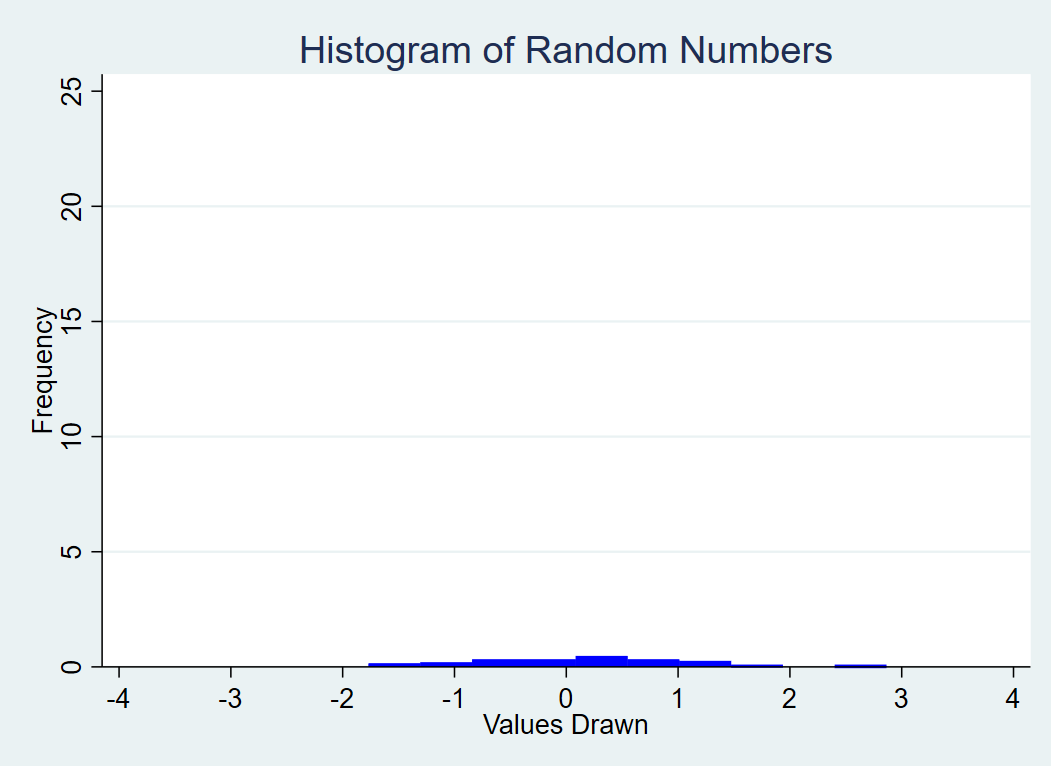

#### Conclusion #### 
While ChatGPT was capable of performing the basic code translation tasks, it needed a lot of correction. It seemed to be a lot less comfortable working with Stata than with R. It's true that R is open source and Stata isn't, but I expected better results because Stata has been around for a long time. For reference, ChatGPT tells me that the first official version of R was released in February 2000, while Stata 1.0 was released in 1985. 

When pressed about its relative amounts of training data, ChatGPT did confess that it had more access to R data- though who knows if that is the truth. 

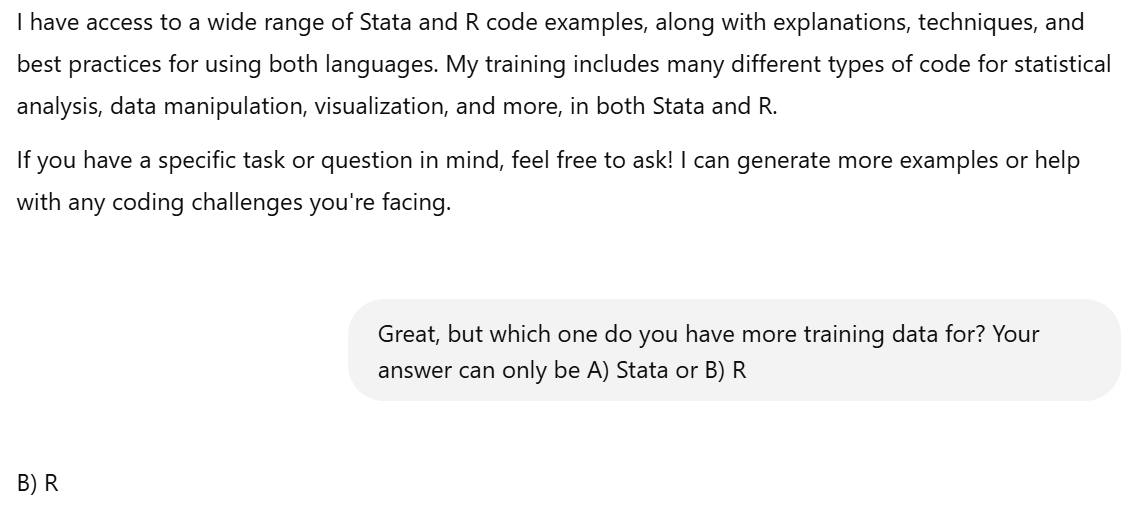

<div class="alert alert-block alert-success">
<b>A final note:</b> I had never before seen the Stata command that kept throwing me errors from the AI-generated responses. As far as I can tell, this command, `edgecolor`, is exclusively found in MATLAB syntax! 
</div> 